# Harris Corner Detection

in computer vision a corner is the junction between two edges, where an edge is a sudden change in image brightness.

### Harris 1988
Harris corner detection was published in 1988 by Chris Harris and Mike Stephens. The basic intuition is that corners can be detected by looking for sudden changes in brightness and by looking in all directions.

### Shi-Tomasi 1994
The Shi-Tomasi corner detection, 1994, _(Good features to track)_ made small changes to the Harris method and achieved better results. The change is found in the scoring mechanism used in the Harris model. 

In [30]:
import cv2
import numpy as np 
import matplotlib.pyplot as plt 
%matplotlib inline

In [31]:
# Convenience function 

def display_color_img(img):
    fig = plt.figure(figsize=(12,10))
    ax = fig.add_subplot(111)
    ax.imshow(img)

def display_gray_img(img):
    fig = plt.figure(figsize=(12,10))
    ax = fig.add_subplot(111)
    ax.imshow(img, cmap='gray')

# The Harris Method

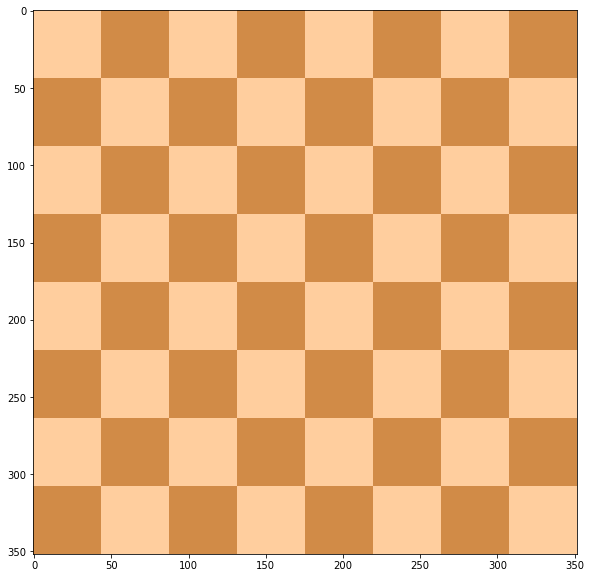

In [32]:
flat_chess = cv2.imread('DATA/flat_chessboard.png')
flat_chess = cv2.cvtColor(flat_chess, cv2.COLOR_BGR2RGB)

display_color_img(flat_chess)

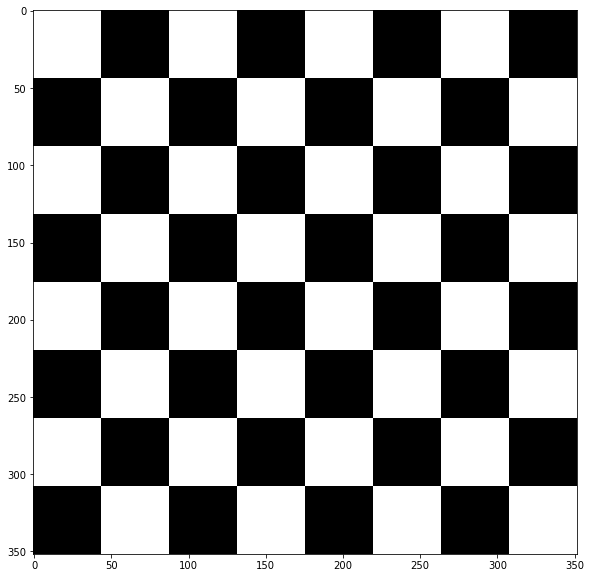

In [33]:
gray_flat_chess = cv2.cvtColor(flat_chess, cv2.COLOR_BGR2GRAY)
display_gray_img(gray_flat_chess)

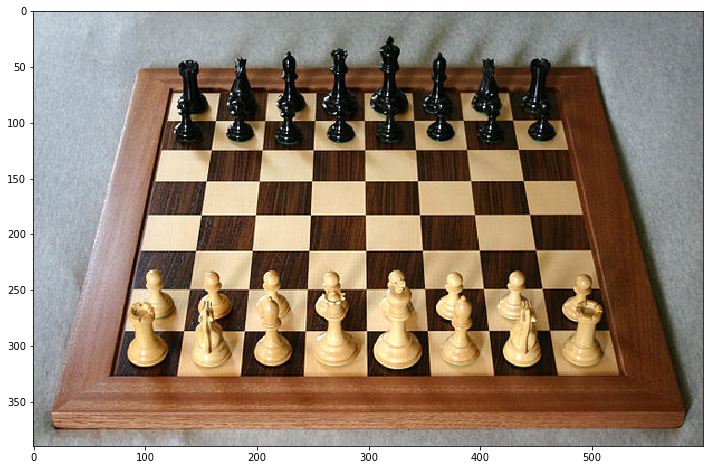

In [34]:
real_chess = cv2.imread('DATA/real_chessboard.jpg')
real_chess = cv2.cvtColor(real_chess, cv2.COLOR_BGR2RGB)
display_color_img(real_chess)

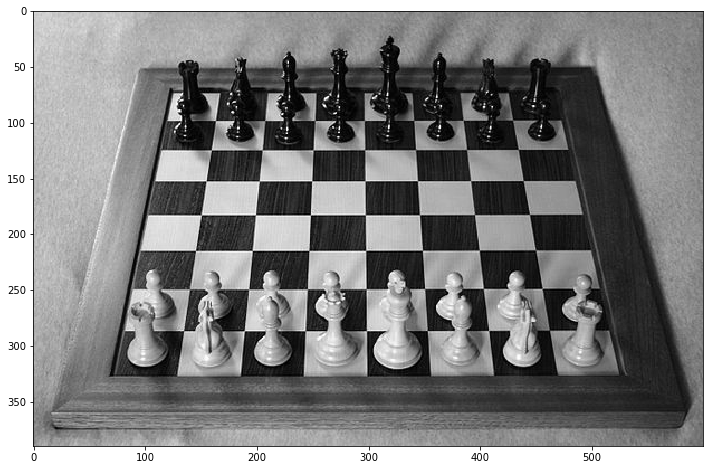

In [35]:
gray_real_chess = cv2.cvtColor(real_chess, cv2.COLOR_BGR2GRAY)
display_gray_img(gray_real_chess)

In [36]:
# create array of values as floats 
gray = np.float32(gray_flat_chess)
gray

array([[197., 197., 197., ..., 127., 127., 127.],
       [197., 197., 197., ..., 127., 127., 127.],
       [197., 197., 197., ..., 127., 127., 127.],
       ...,
       [127., 127., 127., ..., 197., 197., 197.],
       [127., 127., 127., ..., 197., 197., 197.],
       [127., 127., 127., ..., 197., 197., 197.]], dtype=float32)

In [37]:
# apply the harris algorithm, with typical defaults. 
# blocksize is the side of the aperture, ksize is the 
# kernel size and the k if the free parameter with a 
# typical default of 0.04
dest = cv2.cornerHarris(src=gray, blockSize=2, ksize=3, k=0.04)
dest = cv2.dilate(dest, None)

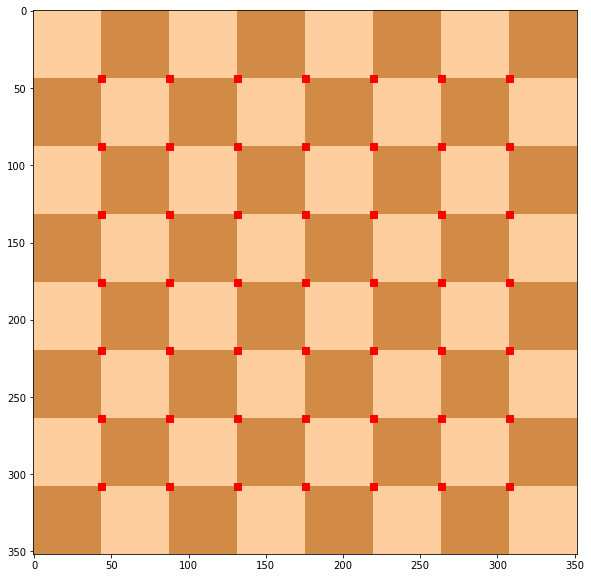

In [38]:
# on the result of the harris corner image (dest)
# calculate anything with a rise of 1% and mark it
# in red. 
flat_chess[dest>0.01*dest.max()] = [255,0,0]

# show the post dilation results 
display_color_img(flat_chess)

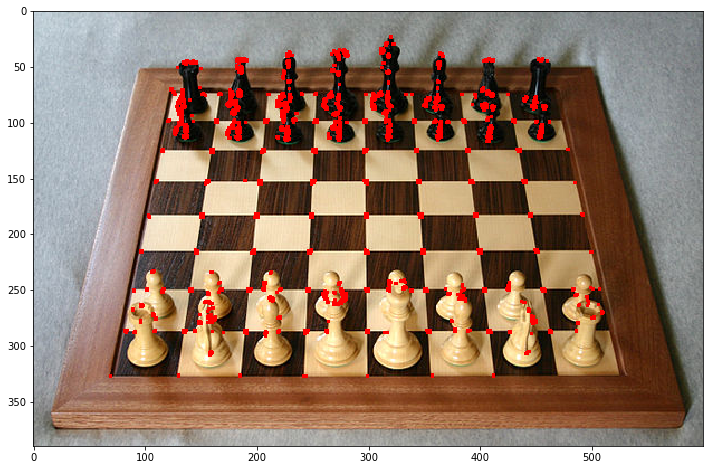

In [39]:
# peform the same task on the image of the real chessboard 

gray = np.float32(gray_real_chess)
dest = cv2.cornerHarris(src=gray, blockSize=2, ksize=3, k=0.04)
dest = cv2.dilate(dest, None)

real_chess[dest>0.01*dest.max()] = [255,0,0]

# show the post dilation results 
display_color_img(real_chess)


# The Shi-Tomasi Method

In [40]:
# reset the images for the demonstration. 

# load and convert the flat 
flat_chess = cv2.imread('DATA/flat_chessboard.png')
flat_chess = cv2.cvtColor(flat_chess, cv2.COLOR_BGR2RGB)

# load and convert the real 
real_chess = cv2.imread('DATA/real_chessboard.jpg')
real_chess = cv2.cvtColor(real_chess, cv2.COLOR_BGR2RGB)

# load the grays 
gray_flat_chess = cv2.cvtColor(flat_chess, cv2.COLOR_BGR2GRAY)
gray_real_chess = cv2.cvtColor(real_chess, cv2.COLOR_BGR2GRAY)

In [ ]:
# applying default params
corners = cv2.goodFeaturesToTrack(gray_flat_chess, 12, 0.01, 10)